In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
raw = pd.read_csv('data/world-happiness-report.csv', index_col=0)
raw1 = pd.read_csv('data/world-happiness-report-2021.csv', index_col=0)
pop = pd.read_csv('data/WPP2019_TotalPopulationBySex.csv', index_col=0)
ctry = pd.read_csv('data/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv', index_col=0)

In [249]:
pop = pop.rename(columns={'Time': 'Year', 'Location': 'Country'})
pop.head()

,Country,VarID,Variant,Year,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
LocID,,,,,,,,,
4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [250]:
ctry = ctry.rename(columns = {'TableName': 'Country'}).drop(columns=['Unnamed: 5'])
ctry.head()

,Region,IncomeGroup,SpecialNotes,Country
Country Code,,,,
ABW,Latin America & Caribbean,High income,NaN,Aruba
AFG,South Asia,Low income,NaN,Afghanistan
AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
ALB,Europe & Central Asia,Upper middle income,NaN,Albania
AND,Europe & Central Asia,High income,NaN,Andorra


In [251]:
raw = raw.rename(columns = {'year': 'Year', 'Life Ladder': 'Life_Ladder'
                           , 'Log GDP per capita': 'Log_GDP_per_capita'
                           , 'Social support': 'Social_support'
                           , 'Healthy life expectancy at birth': 'Life_expectancy'
                           , 'Freedom to make life choices': 'Freedom_make_life_choices'
                           , 'Perceptions of corruption': 'Perception_of_corruption'
                           , 'Positive affect': 'Positive_affect', 'Negative affect': 'Negative_affect'})
raw.index.names = ['Country']
raw.head()

,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Life_expectancy,Freedom_make_life_choices,Generosity,Perception_of_corruption,Positive_affect,Negative_affect
Country,,,,,,,,,,
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [252]:
raw_df = raw.merge(pop, on=['Country','Year'], how='left')
raw_df.head()

,Country,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Life_expectancy,Freedom_make_life_choices,Generosity,Perception_of_corruption,Positive_affect,Negative_affect,VarID,Variant,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,2.0,Medium,2008.5,14225.725,13496.556,27722.281,42.463
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,2.0,Medium,2009.5,14544.055,13850.751,28394.806,43.493
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,2.0,Medium,2010.5,14935.756,14249.755,29185.511,44.704
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,2.0,Medium,2011.5,15415.361,14702.050,30117.411,46.131
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,2.0,Medium,2012.5,15964.874,15196.504,31161.378,47.731


In [253]:
final_raw = raw_df.merge(ctry, on='Country', how='left')
final_raw.head()

,Country,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Life_expectancy,Freedom_make_life_choices,Generosity,Perception_of_corruption,Positive_affect,...,VarID,Variant,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Region,IncomeGroup,SpecialNotes
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,...,2.0,Medium,2008.5,14225.725,13496.556,27722.281,42.463,South Asia,Low income,NaN
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,...,2.0,Medium,2009.5,14544.055,13850.751,28394.806,43.493,South Asia,Low income,NaN
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,...,2.0,Medium,2010.5,14935.756,14249.755,29185.511,44.704,South Asia,Low income,NaN
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,...,2.0,Medium,2011.5,15415.361,14702.050,30117.411,46.131,South Asia,Low income,NaN
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,...,2.0,Medium,2012.5,15964.874,15196.504,31161.378,47.731,South Asia,Low income,NaN


In [254]:
final_raw.isnull().sum(axis = 0)

Country                         0
Year                            0
Life_Ladder                     0
Log_GDP_per_capita             62
Social_support                 13
Life_expectancy                55
Freedom_make_life_choices      45
Generosity                    115
Perception_of_corruption      188
Positive_affect                35
Negative_affect                29
VarID                         253
Variant                       253
MidPeriod                     253
PopMale                       253
PopFemale                     253
PopTotal                      253
PopDensity                    253
Region                        249
IncomeGroup                   249
SpecialNotes                 1937
dtype: int64

In [255]:
# function to create dataframe that stores number of missing rows and the percent of missing rows
# for all columns
def missing_cnt_percent(df):
    # create df that consists of columns and the number of missing values for each 
    data = df.isnull().sum().sort_values(ascending=False)
    missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

    # add column and fill it with the percentage of those missing values
    missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/df.shape[0] * 100)) 
    missing_df = missing_df[missing_df.missing_cnt > 0]
    return missing_df

In [256]:
missing_cnt_percent(final_raw)

,missing_cnt,percent_missing
SpecialNotes,1937,64.52
PopDensity,253,8.43
PopTotal,253,8.43
PopFemale,253,8.43
PopMale,253,8.43
MidPeriod,253,8.43
Variant,253,8.43
VarID,253,8.43
Region,249,8.29
IncomeGroup,249,8.29


In [257]:
# convert index of dataframe into a list
final_raw = final_raw.drop(columns=['SpecialNotes'])

idx = missing_cnt_percent(final_raw).index
index_list = idx.tolist()

In [258]:
index_list.remove('Variant')
index_list.remove('Region')
index_list.remove('IncomeGroup')

In [259]:
# loop through index list and replace NaN values with the mean of each column
for i in index_list:
    final_raw[i].fillna((final_raw[i].mean()), inplace=True)

In [260]:
# check to see if all NaN in 
missing_cnt_percent(final_raw)

,missing_cnt,percent_missing
Variant,253,8.43
IncomeGroup,249,8.29
Region,249,8.29


In [261]:
# the final dataset to perform exploratory analysis
final_raw = final_raw.reset_index().set_index('Country').drop(columns='index')
final_raw.head(20)

,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Life_expectancy,Freedom_make_life_choices,Generosity,Perception_of_corruption,Positive_affect,Negative_affect,VarID,Variant,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Region,IncomeGroup
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,2.0,Medium,2008.5,14225.725,13496.556,27722.281,42.463,South Asia,Low income
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,2.0,Medium,2009.5,14544.055,13850.751,28394.806,43.493,South Asia,Low income
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,2.0,Medium,2010.5,14935.756,14249.755,29185.511,44.704,South Asia,Low income
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,2.0,Medium,2011.5,15415.361,14702.050,30117.411,46.131,South Asia,Low income
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,2.0,Medium,2012.5,15964.874,15196.504,31161.378,47.731,South Asia,Low income
Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,2.0,Medium,2013.5,16554.278,15715.314,32269.592,49.428,South Asia,Low income
Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,2.0,Medium,2014.5,17138.803,16232.001,33370.804,51.115,South Asia,Low income
Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339,2.0,Medium,2015.5,17686.166,16727.437,34413.603,52.712,South Asia,Low income
Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348,2.0,Medium,2016.5,18186.994,17196.034,35383.028,54.197,South Asia,Low income


In [262]:
avg_happy_region = final_raw.groupby(['Region'])['Life_Ladder'].mean().reset_index().set_index('Region')
avg_happy_region

,Life_Ladder
Region,
East Asia & Pacific,5.720115
Europe & Central Asia,6.149581
Latin America & Caribbean,5.936123
Middle East & North Africa,5.749808
North America,7.170302
South Asia,4.610283
Sub-Saharan Africa,4.426389


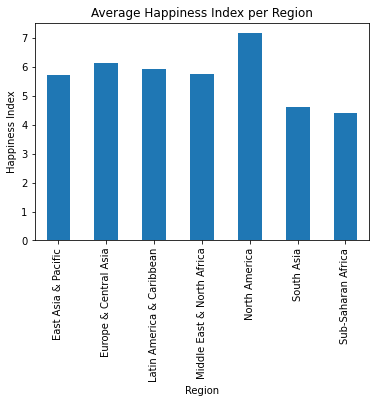

In [263]:
avg_happy['Life Ladder'].plot(kind='bar')
plt.title('Average Happiness Index per Region')
plt.xlabel('Region')
plt.ylabel('Happiness Index')
plt.show()

In [264]:
avg_happy_yr = final_raw.groupby(['Year'])['Life_Ladder'].mean().reset_index().set_index('Year')
avg_happy_yr

,Life_Ladder
Year,
2005,6.446259
2006,5.196899
2007,5.418275
2008,5.418509
2009,5.457667
2010,5.496806
2011,5.424082
2012,5.443754
2013,5.394562


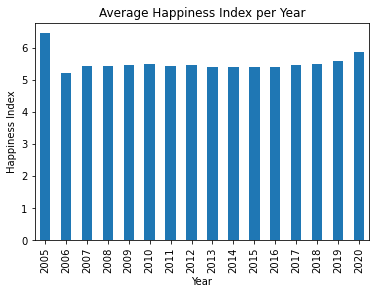

In [265]:
avg_happy_yr['Life_Ladder'].plot(kind='bar')
plt.title('Average Happiness Index per Year')
plt.xlabel('Year')
plt.ylabel('Happiness Index')
plt.show()

In [266]:
one_hot = pd.get_dummies(final_raw[['Variant', 'IncomeGroup', 'Region']])

In [267]:
final_raw = final_raw.drop(['Variant', 'IncomeGroup', 'Region'],axis = 1)

In [268]:
final_raw = final_raw.join(one_hot).drop_duplicates()

In [269]:
final_raw.head()

,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Life_expectancy,Freedom_make_life_choices,Generosity,Perception_of_corruption,Positive_affect,Negative_affect,...,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,...,1,0,0,0,0,0,0,0,1,0
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,...,1,0,0,0,0,0,0,0,1,0
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,...,1,0,0,0,0,0,0,0,1,0
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,...,1,0,0,0,0,0,0,0,1,0
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,...,1,0,0,0,0,0,0,0,1,0


In [270]:
corr_matrix = final_raw.corr()
corr_matrix['Life_Ladder'] = round(corr_matrix['Life_Ladder'],4)
corr_matrix['Life_Ladder'].sort_values(ascending=False)

Life_Ladder                          1.0000
Log_GDP_per_capita                   0.8144
Life_expectancy                      0.7418
Social_support                       0.7360
IncomeGroup_High income              0.7225
Freedom_make_life_choices            0.5307
Positive_affect                      0.4613
Region_Europe & Central Asia         0.3513
Generosity                           0.1786
Region_North America                 0.1559
Year                                 0.0777
MidPeriod                            0.0763
Region_Latin America & Caribbean     0.0652
VarID                                0.0380
PopDensity                           0.0361
Variant_Instant replacement          0.0052
Variant_Constant fertility           0.0052
Variant_Constant mortality           0.0052
Variant_High                         0.0052
Variant_Low                          0.0052
Variant_Upper 80 PI                  0.0052
Variant_Zero migration               0.0052
Variant_Lower 95 PI             

In [271]:
low_corr = corr_matrix[(corr_matrix.Life_Ladder<0.5)].Life_Ladder.sort_values(ascending=False).index

In [272]:
drop_cols = low_corr.tolist()

In [273]:
for col in drop_cols:
    final_raw.drop(col, axis=1, inplace=True)

In [274]:
final_raw.head()

,Life_Ladder,Log_GDP_per_capita,Social_support,Life_expectancy,Freedom_make_life_choices,IncomeGroup_High income
Country,,,,,,
Afghanistan,3.724,7.370,0.451,50.80,0.718,0
Afghanistan,4.402,7.540,0.552,51.20,0.679,0
Afghanistan,4.758,7.647,0.539,51.60,0.600,0
Afghanistan,3.832,7.620,0.521,51.92,0.496,0
Afghanistan,3.783,7.705,0.521,52.24,0.531,0
